In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(nminer)

In [3]:
str(nminer)

'data.frame':	31 obs. of  8 variables:
 $ Miners : int  0 0 1 1 1 1 1 1 0 1 ...
 $ Eucs   : int  2 10 16 20 19 18 12 16 3 12 ...
 $ Area   : int  22 11 51 22 4 61 16 14 5 6 ...
 $ Grazed : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Shrubs : int  1 1 1 1 1 1 1 1 1 0 ...
 $ Bulokes: int  120 67 85 45 160 75 100 321 275 227 ...
 $ Timber : int  16 25 13 12 14 6 12 15 8 10 ...
 $ Minerab: int  0 0 3 2 8 1 8 5 0 4 ...


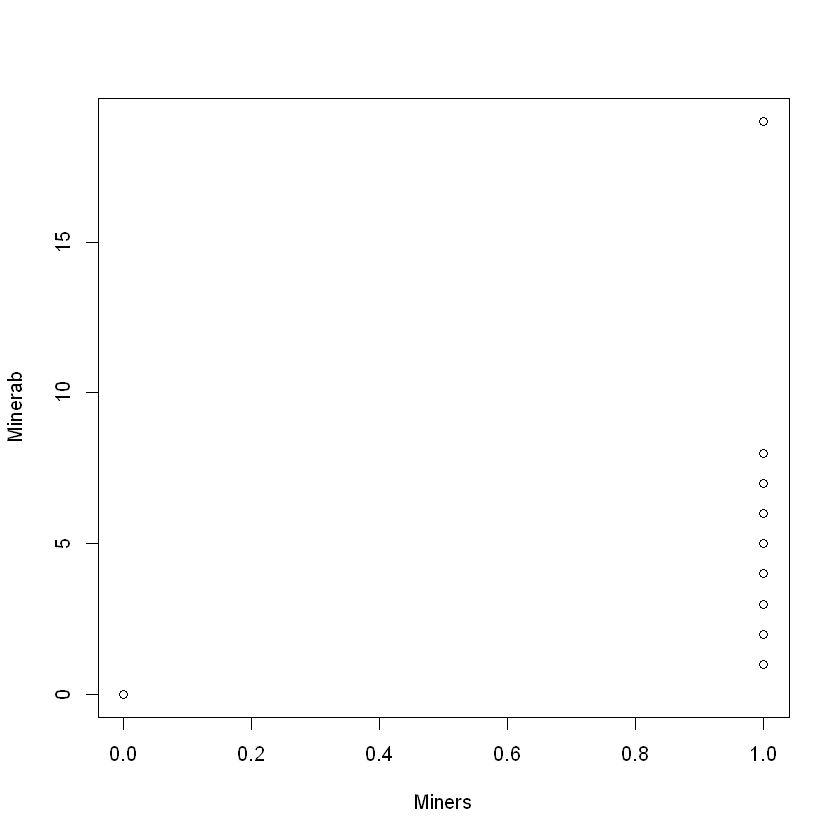

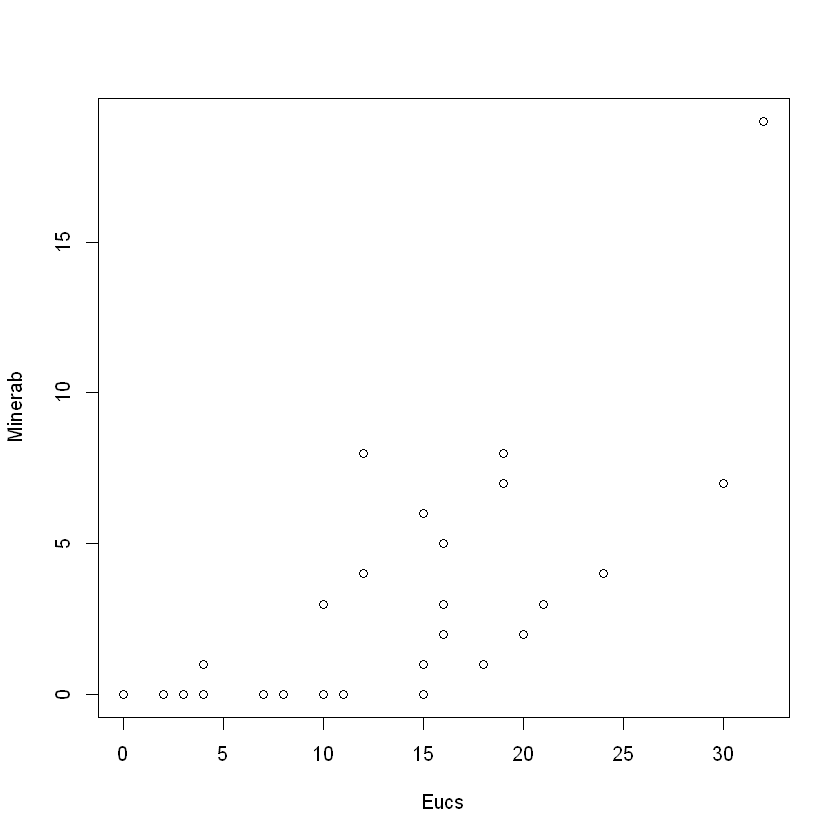

In [6]:
plot(Minerab ~ Miners, data=nminer)
plot(Minerab ~ Eucs, data=nminer)

In [11]:
glm.1 <- glm(Minerab ~ Eucs + Bulokes + Area + factor(Grazed) + factor(Shrubs), family = poisson(link="log"), data=nminer)

In [12]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.269020717,0.711632614,-1.783253,7.454519e-02
Eucs,0.130170820,0.021699913,5.998679,1.989287e-09
Bulokes,0.002039413,0.001584416,1.287170,1.980350e-01
Area,-0.023726832,0.011095099,-2.138497,3.247646e-02
factor(Grazed)1,0.164729627,0.369036161,0.446378,6.553242e-01
factor(Shrubs)1,0.431806874,0.359423625,1.201387,2.296011e-01


In [13]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,30,150.54532,NA
Eucs,1,87.227346,29,63.31798,9.673697e-21
Bulokes,1,2.640443,28,60.67754,1.041745e-01
Area,1,4.194204,27,56.48333,4.056240e-02
factor(Grazed),1,0.205876,26,56.27746,6.500192e-01
factor(Shrubs),1,1.459593,25,54.81786,2.269950e-01


In [16]:
gof.dev <- deviance(glm.1)
pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)
gof.dev/df.residual(glm.1)
gof.pearson/df.residual(glm.1)

[1] 0.0005199247

[1] 0.0001194186

[1] 2.192715

[1] 2.383211

In [17]:
glm.quasi <- glm(Minerab ~ Eucs + Bulokes + Area + factor(Grazed) + factor(Shrubs), family = quasipoisson(link="log"), data=nminer)

In [18]:
coef(summary(glm.quasi))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.269020717,1.098593717,-1.1551320,0.2589581242
Eucs,0.130170820,0.033499572,3.8857457,0.0006640236
Bulokes,0.002039413,0.002445966,0.8337862,0.4122975273
Area,-0.023726832,0.017128229,-1.3852473,0.1782136835
factor(Grazed)1,0.164729627,0.569705210,0.2891489,0.7748517219
factor(Shrubs)1,0.431806874,0.554865710,0.7782187,0.4437435581


In [20]:
gof.dev <- deviance(glm.quasi)
gof.pearson <- sum(glm.quasi$weights * glm.quasi$residuals^2)
pchisq(gof.dev, df=df.residual(glm.quasi), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.quasi), lower.tail = FALSE)
gof.dev / df.residual(glm.quasi)
gof.pearson / df.residual(glm.quasi)

[1] 0.0005199247

[1] 0.0001194186

[1] 2.192715

[1] 2.383211


	Shapiro-Wilk normality test

data:  rstandard(glm.quasi)
W = 0.90016, p-value = 0.007277



	Shapiro-Wilk normality test

data:  qresid(glm.quasi)
W = 0.89456, p-value = 0.005286


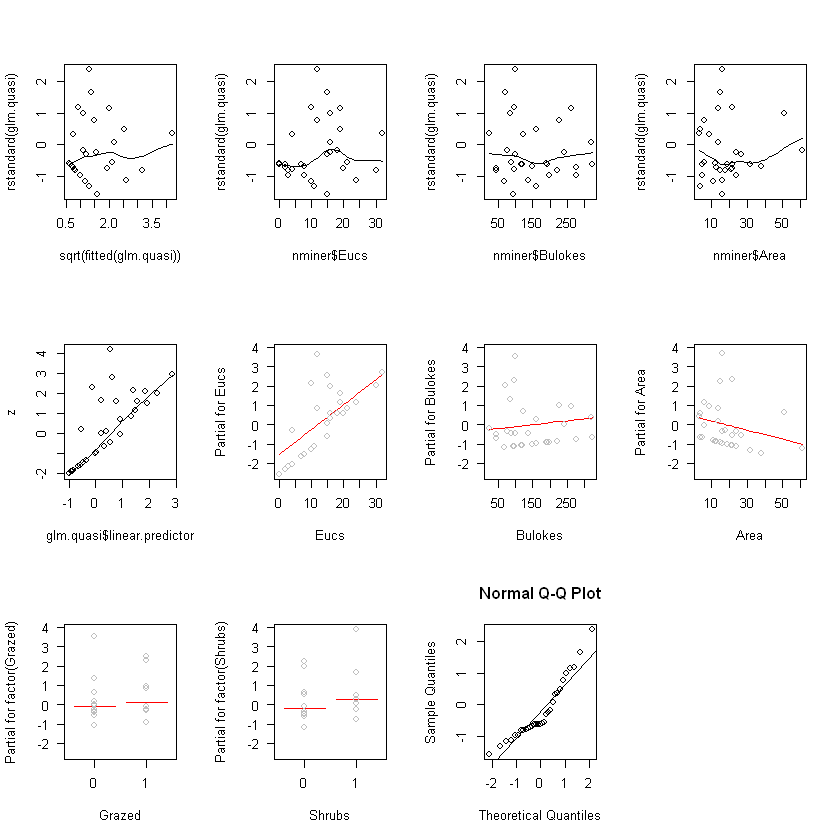

In [31]:
par(mfrow=c(3, 4))
scatter.smooth(rstandard(glm.quasi) ~ sqrt(fitted(glm.quasi)))
scatter.smooth(rstandard(glm.quasi) ~ nminer$Eucs)
scatter.smooth(rstandard(glm.quasi) ~ nminer$Bulokes)
scatter.smooth(rstandard(glm.quasi) ~ nminer$Area)
z <- resid(glm.quasi, type="working") + glm.quasi$linear.predictor
scatter.smooth(z ~ glm.quasi$linear.predictor)
termplot(glm.quasi, partial.resid = TRUE, las=1)
qqnorm(rstandard(glm.quasi))
qqline(rstandard(glm.quasi))
shapiro.test(rstandard(glm.quasi))
shapiro.test(qresid(glm.quasi))